In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\ivypa\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
data = pd.read_csv('student/student-mat.csv', sep=';')
print(data.shape)
data.head()

(395, 33)


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", "course" предпочтение некоторым предметам или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - колисечтво ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хорошо отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Добавим в наши данные целевую переменную из задания и посмотрим на ее распределение:

In [4]:
data['Talc'] = (data['Dalc'] * 5 + data['Walc'] * 2) / 7.0

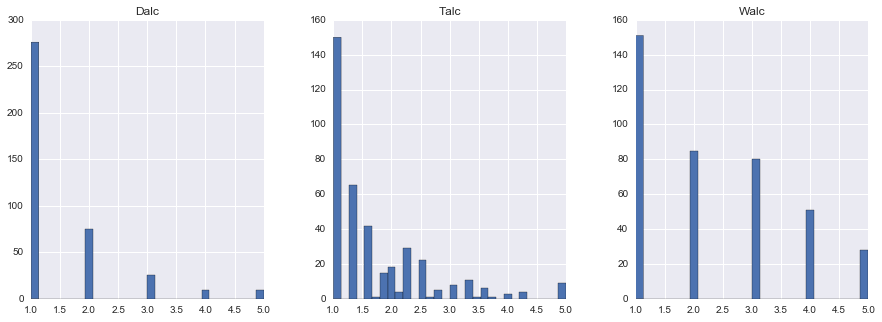

In [5]:
data.hist(['Dalc', 'Walc', 'Talc'], layout=(1, 3), figsize=(15, 5), bins=30);

**Наблюдение:** распределение Dalc и Walc не очень похожи..

**Вывод:** может быть стоит настраивать две регрессии: одну для предсказания Dalc, другую для Walc и пробовать комбинировать результаты?

В данном датасете присутствуют признаки разных типов: вещественные, категориальные, порядковые и бинарные. Не стоит путать порядковые и категориальные признаки! Для первых мы, например, можем, осмысленно считать корреляцию, а для вторых нет.

In [6]:
binary_features = []
categorical_features = []
real_features = []
targets = ['Walc', 'Dalc', 'Talc']
for feature_name in data.drop(targets, axis=1):
    num_values = len(data[feature_name].unique())
    if num_values == 2:
        binary_features.append(feature_name)
        continue
    if num_values < 10:
        categorical_features.append(feature_name)
        continue
    real_features.append(feature_name)

In [7]:
print('Binary: {}\nCategorical: {}\nReal: {}'.format(
        ", ".join(binary_features), 
        ", ".join(categorical_features), 
        ", ".join(real_features)))

Binary: school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
Categorical: age, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health
Real: absences, G1, G2, G3


### Посмотрим на вещественные переменные:

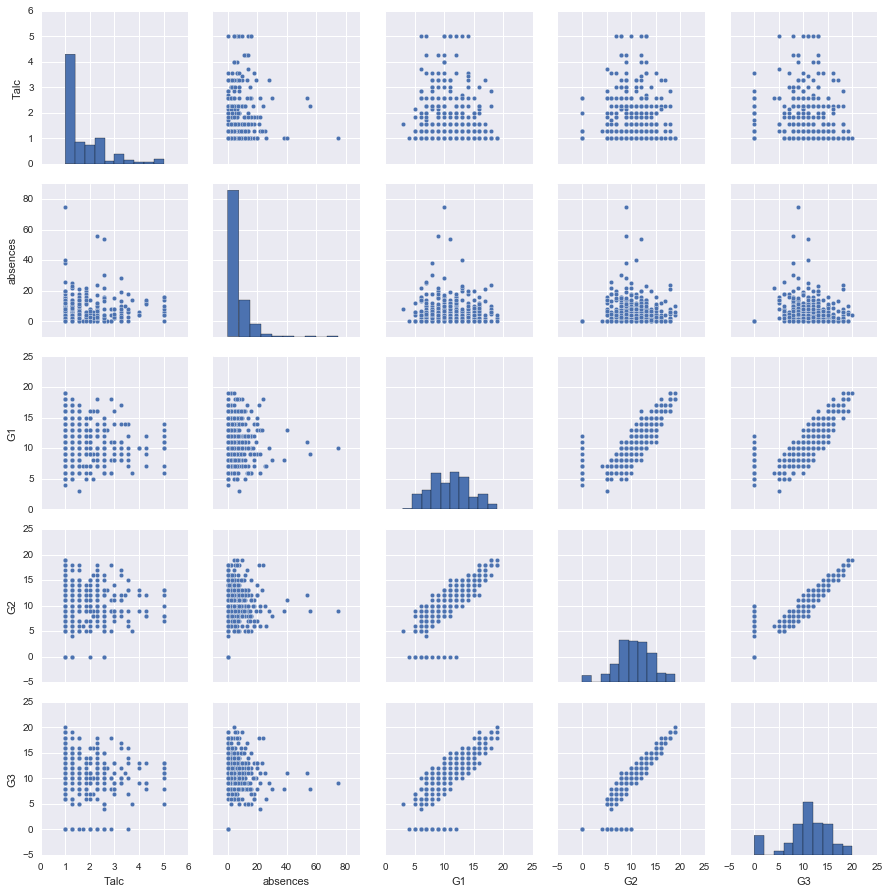

In [8]:
sns.pairplot(data[['Talc'] + real_features])

Видно несколько особенностей. Во-первых, графики зависимости переменных G{1,2,3} друг от друга выглядят линейно. Это означает, что эти признаки сильно коррелированы (они почти линейно зависимы с небольшими случайными отклонениями). Как мы знаем, это в среднем не очень хорошо, потому что мультиколлинеарность ведет к переобучению. Давайте посмотрим на коэффициенты корреляции между этими переменными.

In [9]:
np.round(data.corr(), 2)

age  Medu  Fedu  traveltime  studytime  failures  famrel  \
age         1.00 -0.16 -0.16        0.07      -0.00      0.24    0.05   
Medu       -0.16  1.00  0.62       -0.17       0.06     -0.24   -0.00   
Fedu       -0.16  0.62  1.00       -0.16      -0.01     -0.25   -0.00   
traveltime  0.07 -0.17 -0.16        1.00      -0.10      0.09   -0.02   
studytime  -0.00  0.06 -0.01       -0.10       1.00     -0.17    0.04   
failures    0.24 -0.24 -0.25        0.09      -0.17      1.00   -0.04   
famrel      0.05 -0.00 -0.00       -0.02       0.04     -0.04    1.00   
freetime    0.02  0.03 -0.01       -0.02      -0.14      0.09    0.15   
goout       0.13  0.06  0.04        0.03      -0.06      0.12    0.06   
Dalc        0.13  0.02  0.00        0.14      -0.20      0.14   -0.08   
Walc        0.12 -0.05 -0.01        0.13      -0.25      0.14   -0.11   
health     -0.06 -0.05  0.01        0.01      -0.08      0.07    0.09   
absences    0.18  0.10  0.02       -0.01      -0.06      0.06   -0.04   
G1         -0.06  0.21  0.19       -0.09       0.16     -0.35    0.02   
G2         -0.14  0.22  0.16       -0.15       0.14     -0.36   -0.02   
G3         -0.16  0.22  0.15       -0.12       0.10     -0.36    0.05   
Talc        0.14 -0.01 -0.00        0.15      -0.24      0.15   -0.10   

            freetime  goout  Dalc  Walc  health  absences    G1    G2    G3  \
age             0.02   0.13  0.13  0.12   -0.06      0.18 -0.06 -0.14 -0.16   
Medu            0.03   0.06  0.02 -0.05   -0.05      0.10  0.21  0.22  0.22   
Fedu           -0.01   0.04  0.00 -0.01    0.01      0.02  0.19  0.16  0.15   
traveltime     -0.02   0.03  0.14  0.13    0.01     -0.01 -0.09 -0.15 -0.12   
studytime      -0.14  -0.06 -0.20 -0.25   -0.08     -0.06  0.16  0.14  0.10   
failures        0.09   0.12  0.14  0.14    0.07      0.06 -0.35 -0.36 -0.36   
famrel          0.15   0.06 -0.08 -0.11    0.09     -0.04  0.02 -0.02  0.05   
freetime        1.00   0.29  0.21  0.15    0.08     -0.06  0.01 -0.01  0.01   
goout           0.29   1.00  0.27  0.42   -0.01      0.04 -0.15 -0.16 -0.13   
Dalc            0.21   0.27  1.00  0.65    0.08      0.11 -0.09 -0.06 -0.05   
Walc            0.15   0.42  0.65  1.00    0.09      0.14 -0.13 -0.08 -0.05   
health          0.08  -0.01  0.08  0.09    1.00     -0.03 -0.07 -0.10 -0.06   
absences       -0.06   0.04  0.11  0.14   -0.03      1.00 -0.03 -0.03  0.03   
G1              0.01  -0.15 -0.09 -0.13   -0.07     -0.03  1.00  0.85  0.80   
G2             -0.01  -0.16 -0.06 -0.08   -0.10     -0.03  0.85  1.00  0.90   
G3              0.01  -0.13 -0.05 -0.05   -0.06      0.03  0.80  0.90  1.00   
Talc            0.20   0.35  0.95  0.85    0.09      0.13 -0.12 -0.08 -0.06   

            Talc  
age         0.14  
Medu       -0.01  
Fedu       -0.00  
traveltime  0.15  
studytime  -0.24  
failures    0.15  
famrel     -0.10  
freetime    0.20  
goout       0.35  
Dalc        0.95  
Walc        0.85  
health      0.09  
absences    0.13  
G1         -0.12  
G2         -0.08  
G3         -0.06  
Talc        1.00

Глядя на эту табличку стоит обратить внимание на несколько вещей. Во-первых, видно, что корреляция посчиталась не для всего
множества переменных, а только для тех признаков, для которых осмысленно можно говорить о линейной зависимости (если у вас
признаки -- это индикаторы некоторых неупорядоченных множеств, то нельзя сказать, что увеличение одного из них ведет к
увеличению другого). Во-вторых, мы можем еще раз подтвердить наше наблюдение, что признаки G1, G2 и G3 сильно коррелированы.
Обратите внимание, что сами по себе значения корреляции ничего не показывают! Они могут быть высокими из-за того, что в данных
присутствуют выбросы, и также могут быть близкими к нулю, если зависимость между переменнами очень сильная, но не линейная.
Также не стоит по большим значениям корреляции делать выводы о причинно следственных связях, они чаще всего будут неверными
(если, например, на обе наших переменных оказывает влияние некоторая третья). Вот несколько примеров, с которыми стоит
внимательно разобраться:

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

http://www.tylervigen.com/

http://guessthecorrelation.com/

http://www.machinelearning.ru/wiki/images/e/e7/Psad_corr.pdf (слайды 1-6, особенно 5-ый!)


In [10]:
dc = data.corr()
idx = np.where(np.abs(dc) > 0.5)
indices = [(dc.index[x], dc.columns[y]) for x, y in zip(*idx) if x < y]
indices

[('Medu', 'Fedu'),
 ('Dalc', 'Walc'),
 ('Dalc', 'Talc'),
 ('Walc', 'Talc'),
 ('G1', 'G2'),
 ('G1', 'G3'),
 ('G2', 'G3')]

**Наблюдение:** есть сильная корреляция между некоторыми признаками.

**Вывод:** можно попробовать(!) преобразовать коррелированные признаки (выбросить часть? взять среднее?)

**Наблюдение:** есть сильная корреляция между некоторыми признаками и целевой переменной

**Вывод:** ?

**Наблюдение:** некоторые переменные очень слабо коррелированы с целевой переменной

**Вывод:** ?

Посмотрим теперь на признак absences. По графикам видно, что есть небольшое количество точек, которые стоят обособленно -- это
скорее всего выбросы (очень большие, нехарактерные значения признака). С ними нужно что-то сделать. Возможно стоит просто 
выбросить эти наблюдения. Но также можно подумать в сторону того, чтобы разбить признак absences на группы (много прогуливал, 
мало прогуливал, средне и т.д.) и тогда эти выбросы просто попадут в последнюю группу и могут оказаться полезными (а могут и 
не оказаться).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A2A0D9470>]], dtype=object)

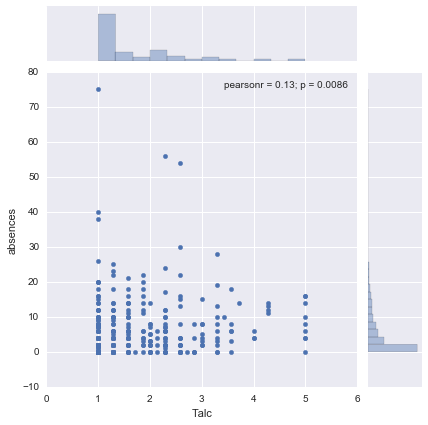

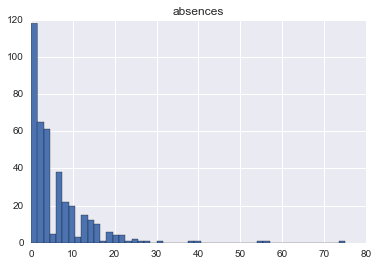

In [11]:
sns.jointplot('Talc', 'absences', data)
data.hist('absences', bins=50)

**Наблюдение:** признак absences содержит выбросы

**Вывод:** выбросим эти объекты? добавим новый признак??

*feature engineering (добавление новых признаков) — это то, что обычно дает наибольший прирост в качестве*

Попробуем теперь разобраться со странной полоской, возникающей в признаках G{1,2,3} (эта полоска соответствует G2 = 0 или G3 = 
0). То есть, она соответствует тем студентам, которым поставили 0 за какой-то экзамен. Странно, что они выбиваются из общей 
зависимости и, скорее всего, для нас также являются выбросами. Попробуем посмотреть на данные и понять, что повляило на эту 
оценку: может быть они много болели или может быть много прогуливали?

In [12]:
pd.options.display.max_columns = 100

In [13]:
data[data['G1'] == 0]

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, Talc]
Index: []

In [14]:
data[data['G2'] == 0]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
130     GP   F   15       R     GT3       T     3     4  services   teacher   
131     GP   F   15       U     GT3       T     1     1   at_home     other   
134     GP   M   15       R     GT3       T     3     4   at_home   teacher   
135     GP   F   15       U     GT3       T     4     4  services   at_home   
136     GP   M   17       R     GT3       T     3     4   at_home     other   
137     GP   F   16       U     GT3       A     3     3     other     other   
144     GP   M   17       U     GT3       T     2     1     other     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
162     GP   M   16       U     LE3       T     1     2     other     other   
242     GP   M   16       U     LE3       T     4     3   teacher     other   
244     GP   F   18       U     GT3       T     2     1     other     other   
269     GP   F   18       R     GT3       T     2     1     other     other   
332     GP   F   18       U     GT3       T     3     3  services  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
130      course   father           2          3         2        no    yes   
131      course   mother           3          1         0        no    yes   
134      course   mother           4          2         0        no    yes   
135      course   mother           1          3         0        no    yes   
136      course   mother           3          2         0        no     no   
137      course    other           2          1         2        no    yes   
144        home   mother           1          1         3        no    yes   
153        home   mother           1          1         3        no    yes   
162      course   mother           2          1         1        no     no   
242      course   mother           1          1         0        no     no   
244      course    other           2          3         0        no    yes   
269  reputation   mother           2          2         0        no    yes   
332        home   mother           1          2         0        no     no   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
130   no         no     yes    yes      yes      yes       4         2      2   
131   no        yes      no    yes      yes      yes       4         3      3   
134   no         no     yes    yes       no      yes       5         3      3   
135   no        yes     yes    yes      yes      yes       4         3      3   
136   no         no     yes    yes       no       no       5         4      5   
137   no        yes      no    yes      yes      yes       4         3      2   
144   no         no     yes    yes      yes       no       5         4      5   
153   no         no     yes     no      yes      yes       4         5      4   
162   no        yes     yes    yes       no       no       4         4      4   
242   no        yes      no    yes      yes       no       5         4      5   
244  yes         no      no    yes      yes      yes       4         4      4   
269   no         no     yes     no      yes      yes       4         3      5   
332   no        yes     yes    yes      yes       no       5         3      4   

     Dalc  Walc  health  absences  G1  G2  G3      Talc  
130     2     2       5         0  12   0   0  2.000000  
131     1     2       4         0   8   0   0  1.285714  
134     1     1       5         0   9   0   0  1.000000  
135     1     1       5         0  11   0   0  1.000000  
136     2     4       5         0  10   0   0  2.571429  
137     1     1       5         0   4   0   0  1.000000  
144     1     2       5         0   5   0   0  1.285714  
153     1     1       4         0   5   0   0  1.000000  
162     2     4       5         0   7   0   0  2.571429  
242     1     1       3         0   6   0   0  1.000000  
244     1     1       3        

In [15]:
data[data['G3'] == 0]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
128     GP   M   18       R     GT3       T     2     2  services     other   
130     GP   F   15       R     GT3       T     3     4  services   teacher   
131     GP   F   15       U     GT3       T     1     1   at_home     other   
134     GP   M   15       R     GT3       T     3     4   at_home   teacher   
135     GP   F   15       U     GT3       T     4     4  services   at_home   
136     GP   M   17       R     GT3       T     3     4   at_home     other   
137     GP   F   16       U     GT3       A     3     3     other     other   
140     GP   M   15       U     GT3       T     4     3   teacher  services   
144     GP   M   17       U     GT3       T     2     1     other     other   
146     GP   F   15       U     GT3       T     3     2    health  services   
148     GP   M   16       U     GT3       T     4     4   teacher   teacher   
150     GP   M   18       U     LE3       T     1     1     other     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
160     GP   M   17       R     LE3       T     2     1   at_home     other   
162     GP   M   16       U     LE3       T     1     2     other     other   
168     GP   F   16       U     GT3       T     2     2     other     other   
170     GP   M   16       U     GT3       T     3     4     other     other   
173     GP   F   16       U     GT3       T     1     3   at_home  services   
221     GP   F   17       U     GT3       T     1     1   at_home     other   
239     GP   M   18       U     GT3       T     2     2     other  services   
242     GP   M   16       U     LE3       T     4     3   teacher     other   
244     GP   F   18       U     GT3       T     2     1     other     other   
259     GP   F   17       U     LE3       T     2     2  services  services   
264     GP   F   18       U     GT3       T     2     2   at_home  services   
269     GP   F   18       R     GT3       T     2     1     other     other   
296     GP   F   19       U     GT3       T     4     4    health     other   
310     GP   F   19       U     LE3       T     1     2  services  services   
316     GP   F   18       U     GT3       T     2     1  services     other   
332     GP   F   18       U     GT3       T     3     3  services  services   
333     GP   F   18       U     LE3       T     2     2     other     other   
334     GP   F   18       R     GT3       T     2     2   at_home     other   
337     GP   F   17       U     GT3       T     3     2     other     other   
341     GP   M   18       U     GT3       T     4     4   teacher  services   
343     GP   F   17       U     GT3       A     2     2   at_home   at_home   
367     MS   F   17       R     GT3       T     1     1     other  services   
383     MS   M   19       R     GT3       T     1     1     other  services   
387     MS   F   19       R     GT3       T     2     3  services     other   
389     MS   F   18       U     GT3       T     1     1     other     other   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
128  reputation   mother           1          1         2        no    yes   
130      course   father           2          3         2        no    yes   
131      course   mother           3          1         0        no    yes   
134      course   mother           4          2         0        no    yes   
135      course   mother           1          3         0        no    yes   
136      course   mother           3          2         0        no     no   
137      course    other           2          1         2        no    yes   
140      course   father           2          4         0       yes    yes   
144        home   mother           1          1         3        no    yes   
146        home   father           1          2         3        no    yes   
148      course   mother           1          1         0       

Глядя на данные объяснить эту зависимость довольно сложно. Поэтому, скорее всего она вызвана какими-то причинами нам неизвестными (может быть этих студентов на самом деле отчислили, а потом автоматом ставили 0, или может быть у них что-то случилось в семье, или что-то другое). Так как эту зависимость мы не знаем, то для нас это чистые выбросы, которые опять же стоит удалить.

**Наблюдение:** отклонение от зависимости на графиках G1, G2, G3. Явного объяснения из данных найти не удается.

**Вывод:** добавить признак? удалить выбросы?

Стоит ли добавлять квадраты признаков? Глядя на графики, кажется, что наша целевая переменная не зависит квадратично от вещественных признаков. Но не стоит торопиться с выводами! Так как мы рассматриваем не только вещественные переменные, но и категориальные и бинарные, то реально, у нас может образоваться какое-то подмножество объектов (например, только девочки) от которых уже будет квадратичная зависимость. Поэтому, подобные выводы всегда стоит проверять на практике -- обучать модели и смотреть, насколько хорошо они работают.

### Посмотрим на категориальные переменные:

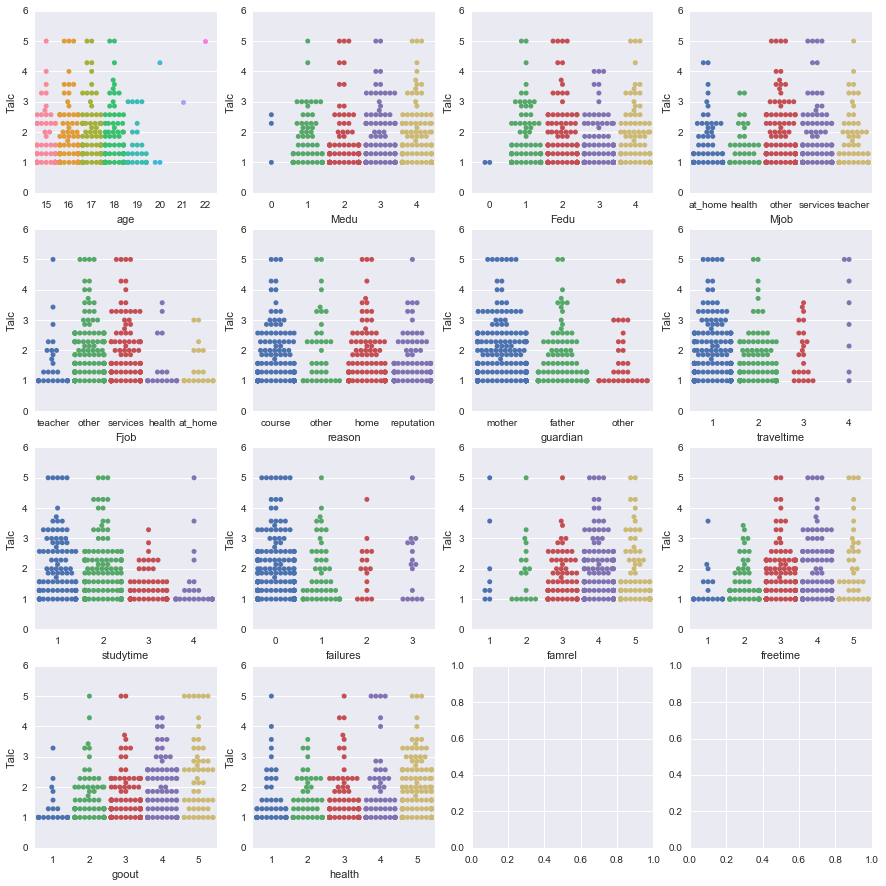

In [16]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.swarmplot(categorical_features[c], 'Talc', data=data, ax=axes[i, j])
        c += 1
        if c == len(categorical_features):
            break

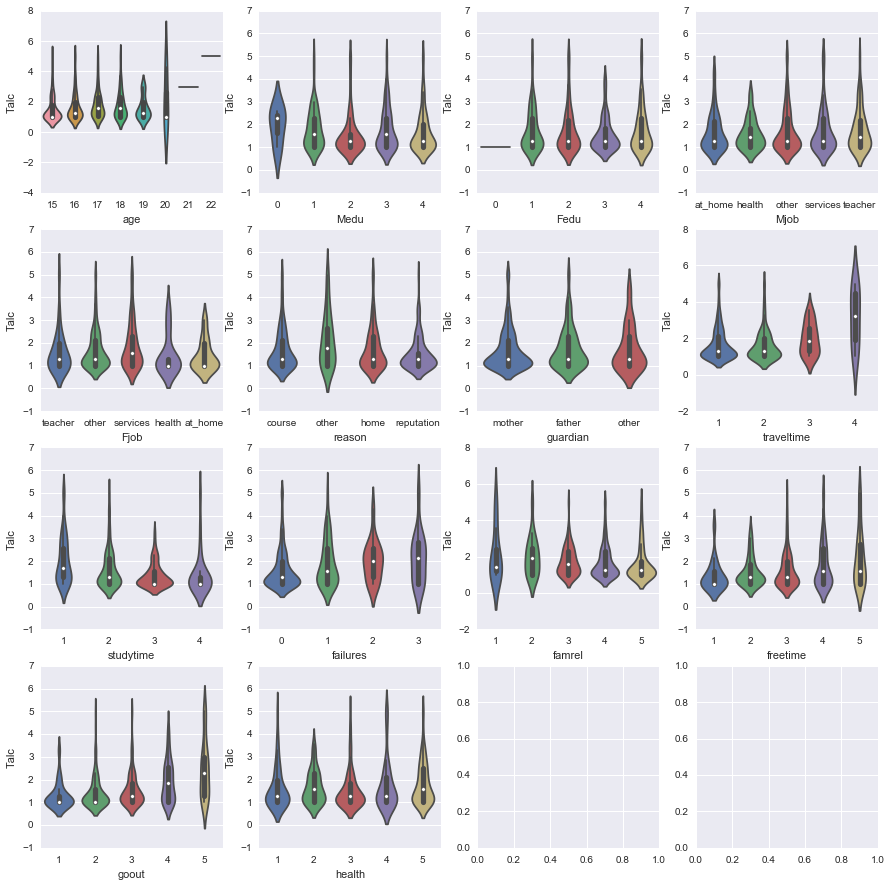

In [17]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.violinplot(categorical_features[c], 'Talc', data=data, ax=axes[i, j])
        c += 1
        if c == len(categorical_features):
            break

Как интерпретировать полученные графики можно посмотреть, например, вот здесь: https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html.

Глядя на графики видно, что в некоторых категориях у нас очень мало объектов (например, для больших значений возраста). Это означает, что мы, скорее всего, не сможем адекватно настроить веса для этих категорий и с ними что-то нужно сделать. Можно ли просто выбросить эти объекты? Правильный ответ -- нет, потому что объекты с такими значениями категорий могут оказаться в тестовой выборке. Но что-то нужно сделать, например, можно объединить несколько категорий в одну.

**Наблюдение:** есть значения категорий для которых очень мало данных

**Вывод:** можно попробовать объединить категории?

Можем попробовать проверить предоположение о том, что оценка за экзамен зависит от количества неудач в прошлом. Действительно, кажется, что некоторая зависимость наблюдается:

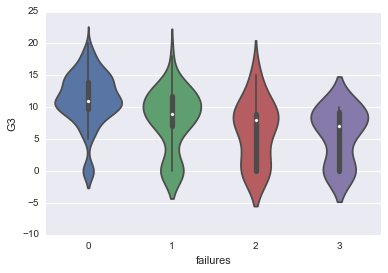

In [18]:
sns.violinplot('failures', 'G3', data=data)

Мы не будем делать никаких содержательных выводов из этого наблюдения -- это просто иллюстрация того, насколько удобно использовать визуализацию для проверки ваших гипотез о данных.

### Посмотрим на бинарные переменные:

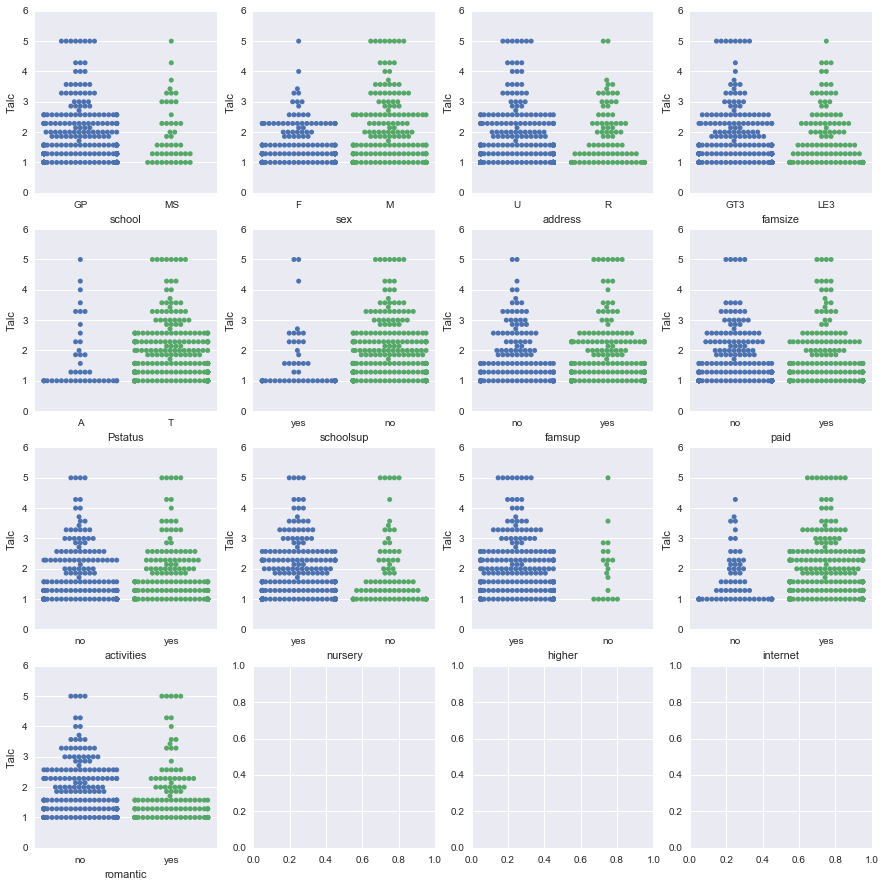

In [19]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.swarmplot(binary_features[c], 'Talc', data=data, ax=axes[i, j])
        c += 1
        if c == len(binary_features):
            break

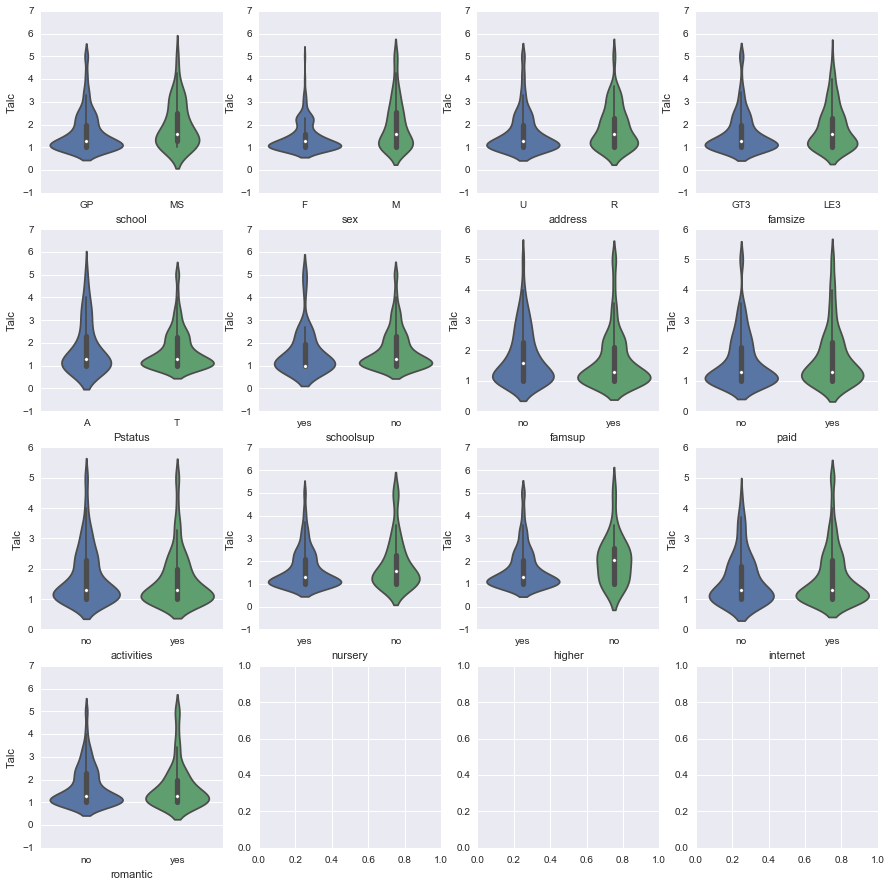

In [20]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.violinplot(binary_features[c], 'Talc', data=data, ax=axes[i, j])
        c += 1
        if c == len(binary_features):
            break

**Наблюдение:** распределения для некоторых бинарных признаков выглядят очень похожи

**Вывод:** удалим эти признаки? Нет!

Глядя, например, на график признака activities можно заметить, что у нас практически одинаковое распределение на целевую переменную для обоих возможных значений признака. Значит ли это, что мы можем его удалить? Нет! Он может входить в содержательные зависимости вместе с другими признаками (например, если мы посмотрим на наличие активностей только у девочек, то зависимость целевой переменной теоретически может появиться). Поэтому перед тем как делать выводы стоит попробовать убедиться, что таких зависимостей нет:

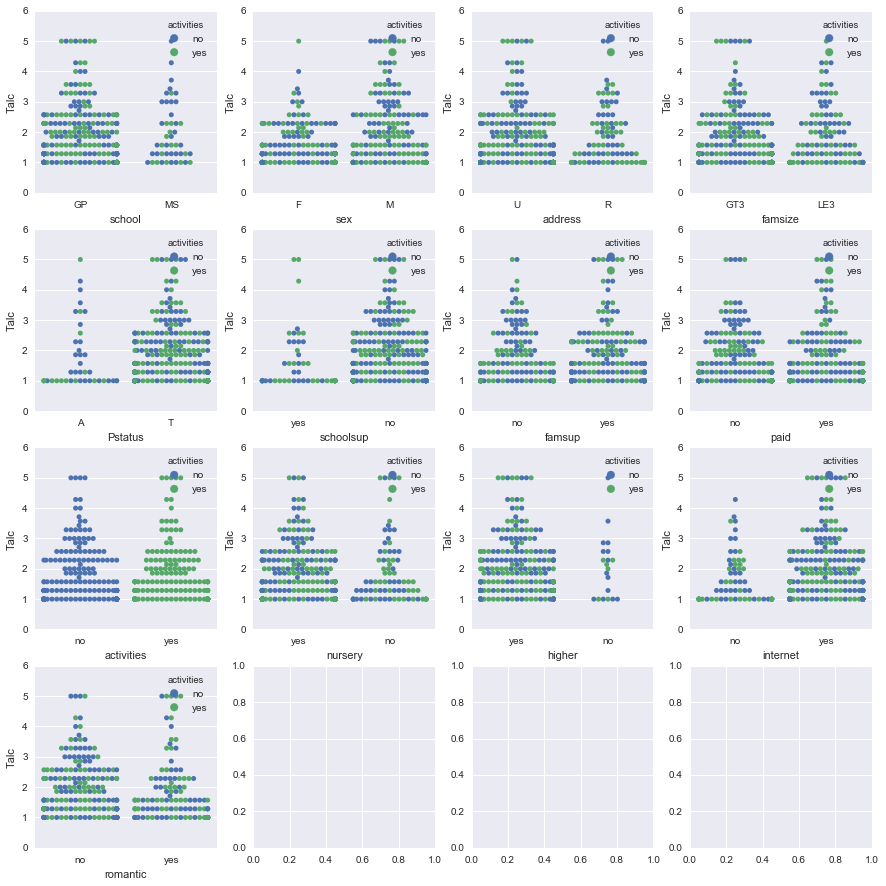

In [21]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.swarmplot(binary_features[c], 'Talc', hue='activities', data=data, ax=axes[i, j])
        c += 1
        if c == len(binary_features):
            break

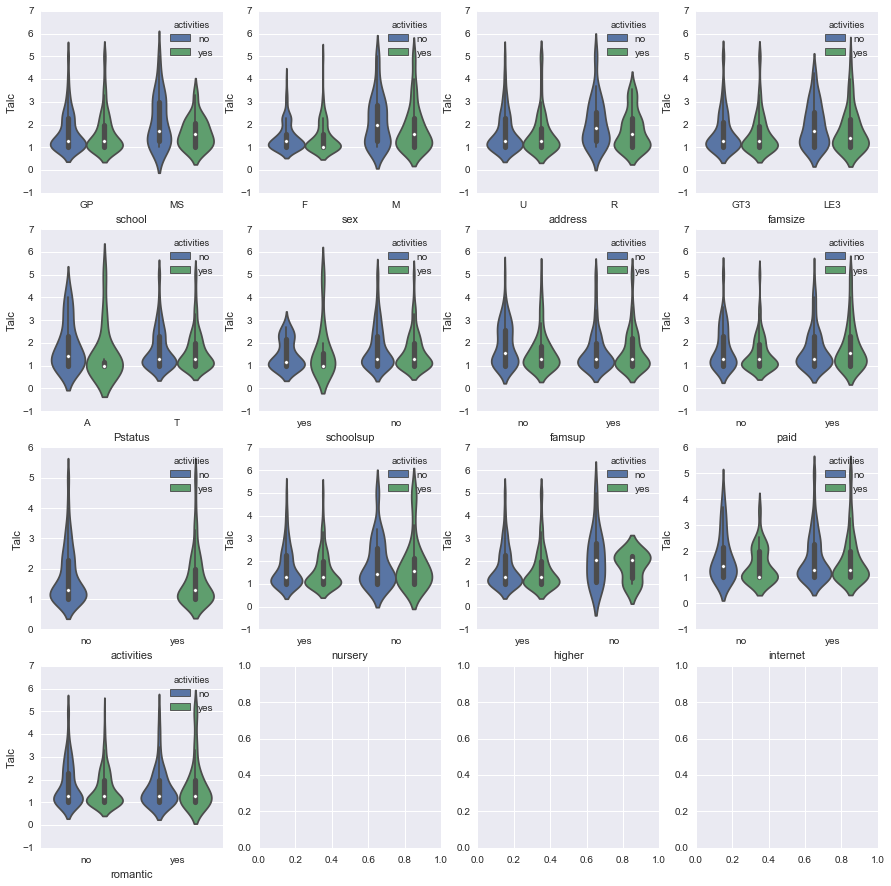

In [22]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.violinplot(binary_features[c], 'Talc', hue='activities', data=data, ax=axes[i, j])
        c += 1
        if c == len(binary_features):
            break

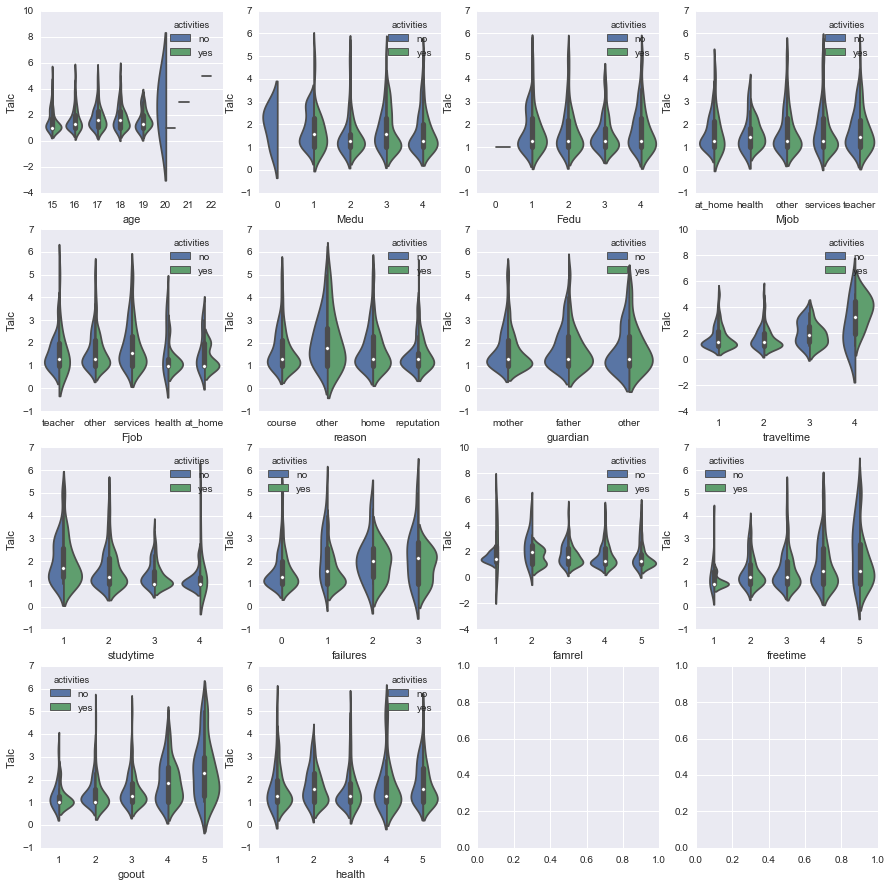

In [23]:
figure, axes = plt.subplots(4, 4, figsize=(15, 15))
c = 0
for i in range(4):
    for j in range(4):
        sns.violinplot(categorical_features[c], 'Talc', hue='activities', split=True, data=data, ax=axes[i, j])
        c += 1
        if c == len(categorical_features):
            break

Вроде бы подобных зависимостей не наблюдается (за исключением нескольких случаев, когда у нас просто очень мало данных). Но все равно выбрасывать этот признак стоит только после экспериментальной проверка, что он бесполезен, потому что мы не учитывали, например, тройные взаимодействия.

### Преобразуем данные

In [24]:
pd.get_dummies(data).head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3      Talc  school_GP  school_MS  \
0     1     1       3         6   5   6   6  1.000000        1.0        0.0   
1     1     1       3         4   5   5   6  1.000000        1.0        0.0   
2     2     3       3        10   7   8  10  2.285714        1.0        0.0   
3     1     1       5         2  15  14  15  1.000000        1.0        0.0   
4     1     2       5         4   6  10  10  1.285714        1.0        0.0   

   sex_F  sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
0    1.0    0.0        0.0        1.0          1.0          0.0        1.0   
1    1.0    0.0        0.0        1.0          1.0          0.0        0.0   
2    1.0    0.0        0.0        1.0          0.0          1.0        0.0   
3    1.0    0.0        0.0        1.0          1.0          0.0        0.0   
4    1.0    0.0        0.0        1.0          1.0          0.0        0.0   

   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0        0.0           1.0          0.0         0.0            0.0   
1        1.0           1.0          0.0         0.0            0.0   
2        1.0           1.0          0.0         0.0            0.0   
3        1.0           0.0          1.0         0.0            0.0   
4        1.0           0.0          0.0         1.0            0.0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
0           0.0           0.0          0.0         0.0            0.0   
1           0.0           0.0          0.0         1.0            0.0   
2           0.0           0.0          0.0         1.0            0.0   
3           0.0           0.0          0.0         0.0            1.0   
4           0.0           0.0          0.0         1.0            0.0   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0           1.0            1.0          0.0           0.0                0.0   
1           0.0            1.0          0.0           0.0                0.0   
2           0.0            0.0          0.0           1.0                0.0   
3           0.0            0.0          1.0           0.0                0.0   
4           0.0            0.0          1.0           0.0                0.0   

   guardian_father  guardian_mother  guardian_other  schoolsup_no  \
0              0.0              1.0             0.0           0.0   
1              1.0              0.0             0.0           1.0   
2              0.0              1.0             0.0           0.0   
3              0.0              1.0             0.0           1.0   
4              1.0              0.0             0.0           1.0   

   schoolsup_yes  famsup_no  famsup_yes  paid_no  paid_yes  activities_no  \
0            1.0        1.0         0.0      1.0       0.0            1.0   
1            0.0        0.0         1.0      1.0       0.0            1.0   
2            1.0        1.0         0.0      0.0       1.0            1.0   
3            0.0        0.0         1.0      0.0       1.0            0.0   
4            0.0        0.0         1.0      0.0       1.0            1.0   

   activities_yes  nursery_no  nursery_yes  higher_no  higher_yes  \
0             0.0         0.0          1.0        0.0         1.0   
1             0.0         1.0          0.0        0.0         1.0   
2             0.0         0.0          1.0        0.0         1.0   
3             1.0         0.0          1.0        0.0         1.0   
4             

In [25]:
for feature in categorical_features + binary_features:
    data[feature] = data[feature].astype('category')

In [26]:
pd.get_dummies(data).head()

Dalc  Walc  absences  G1  G2  G3      Talc  school_GP  school_MS  sex_F  \
0     1     1         6   5   6   6  1.000000        1.0        0.0    1.0   
1     1     1         4   5   5   6  1.000000        1.0        0.0    1.0   
2     2     3        10   7   8  10  2.285714        1.0        0.0    1.0   
3     1     1         2  15  14  15  1.000000        1.0        0.0    1.0   
4     1     2         4   6  10  10  1.285714        1.0        0.0    1.0   

   sex_M  age_15  age_16  age_17  age_18  age_19  age_20  age_21  age_22  \
0    0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1    0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
2    0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

   address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  Pstatus_T  \
0        0.0        1.0          1.0          0.0        1.0        0.0   
1        0.0        1.0          1.0          0.0        0.0        1.0   
2        0.0        1.0          0.0          1.0        0.0        1.0   
3        0.0        1.0          1.0          0.0        0.0        1.0   
4        0.0        1.0          1.0          0.0        0.0        1.0   

   Medu_0  Medu_1  Medu_2  Medu_3  Medu_4  Fedu_0  Fedu_1  Fedu_2  Fedu_3  \
0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
1     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0   
4     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0   

   Fedu_4  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  \
0     1.0           1.0          0.0         0.0            0.0           0.0   
1     0.0           1.0          0.0         0.0            0.0           0.0   
2     0.0           1.0          0.0         0.0            0.0           0.0   
3     0.0           0.0          1.0         0.0            0.0           0.0   
4     0.0           0.0          0.0         1.0            0.0           0.0   

   Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0           0.0          0.0         0.0            0.0           1.0   
1           0.0          0.0         1.0            0.0           0.0   
2           0.0          0.0         1.0            0.0           0.0   
3           0.0          0.0         0.0            1.0           0.0   
4           0.0          0.0         1.0            0.0           0.0   

   reason_course  reason_home  reason_other  reason_reputation  \
0            1.0          0.0           0.0                0.0   
1            1.0          0.0           0.0                0.0   
2            0.0          0.0           1.0                0.0   
3            0.0          1.0           0.0                0.0   
4            0.0          1.0           0.0                0.0   

   guardian_father  guardian_mother  guardian_other  traveltime_1  \
0              0.0              1.0             0.0           0.0   
1              1.0              0.0             0.0           1.0   
2              0.0              1.0             0.0           1.0   
3              0.0              1.0             0.0           1.0   
4              1.0              0.0             0.0           1.0   

   traveltime_2  traveltime_3  traveltime_4  studytime_1  studytime_2  \
0           1.0           0.0           0.0          0.0          1.0   
1           0.0           0.0           0.0          0.0          1.0   
2           0.0           0.0           0.0          0.0          1.0   
3           0.0           0.0           0.0          0.0          0.0   
4           0.0           0.0           0.0          0.0    

In [27]:
pd.get_dummies(data).shape

(395, 100)

Обратите внимание, что правильный способ преобразовать данные из категориальных в вещественные -- это не просто применить функцию get_dummies, но и предварительно сказать pandas, какие из наших переменных реально категориальные (иначе признаки, кодируемые цифрами так ими и останутся).

In [28]:
data_transformed = pd.get_dummies(data)
# преобразуем данные после анализа
# data_transformed = ...

In [29]:
num_data = data_transformed.drop(targets, axis=1).as_matrix()
num_targets = data_transformed['Talc'].as_matrix()

In [30]:
np.min(num_data, axis=0), np.max(num_data, axis=0)

(array([ 0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 75.,  19.,  19.,  20.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
     

**Наблюдение:** диапазоны признаков различаются

**Вывод:** признаки стоит нормировать. Как нормируем второй признак?

Признаки практически всегда стоит отнормировать. Для обычной линейной регрессии это совершенно не обязательно, а вот если вы используете регуляризаторы, то это становится просто необходимо (почему?) Но будьте внимательны -- если у нас минимальное значение признаков на обучающей выборке не равно реальному минимальному значению (второй признак), то не стоит его бездумно вычитать, ведь мы можем получить меньшие значения на объектах тестовой выборки и все будет не очень хорошо!

In [31]:
num_data = num_data / np.max(num_data, axis=0)

In [32]:
from sklearn.cross_validation import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(num_data, num_targets, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

Что используем?

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# ...